# Technical Analysis and Model Building for stock/crypto

## Two section in this notebook where stock and crypto currency will use different API to pull data

### Generic function 

In [2]:
def trending(df):
    if (df['Close'] - df['Open']) > 0:
        return 'green'
    else:
        return 'red'

### Section 1: Stock Data Pulling

In [3]:
!pip install pandas_datareader
!pip install fix-yahoo-finance
!pip install pandas-profiling
!pip install seaborn

__Sample of pulling stock price from yahoo finance (Intel share price)__

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf

stock_name = 'INTC'
data_INTEL= yf.pdr_override(stock_name,start='2019-1-1')

[*********************100%***********************]  1 of 1 completed


Understanding pandas dataframe better

In [35]:
data_INTEL['tag'] = data_INTEL.apply(trending,axis=1)

__Can we predict share price ?????__

```
To analyse Intel share price further , we can look at more than just pricing sense (as share price is not a good "label" to in any AI/ML model)

TL;DR;

Market forecasts are particularly tricky. No one can see the future – the world is inherently uncertain and surprising things will happen. Even if you know what’s going to happen, however, you might not know how markets will respond. - Irish Times

https://www.irishtimes.com/business/personal-finance/why-do-we-bother-with-stock-market-forecasts-1.3747774
```

__Technical analysis__
```
Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume.

https://www.investopedia.com/terms/t/technicalanalysis.asp
```


In [37]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

analysis_df = data_INTEL


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
            go.Candlestick(
                x=analysis_df.index,
                low=analysis_df.Low,
                high=analysis_df.High,
                close=analysis_df.Close,
                open=analysis_df.Open,
                increasing_line_color='green',
                decreasing_line_color='red'
            )
)
fig.add_trace(go.Bar(x=analysis_df.index, y=analysis_df['Volume'],marker={'color': analysis_df['tag']}),secondary_y=True)


fig.update_layout(
    title = f'{stock_name}',
    yaxis_title = f'{stock_name} Price USD ($)',
    xaxis_title = 'Date'
)
fig.show()

## section 2 : Crypto Currencies pulling

In [4]:
!pip install cryptocmd
!pip install python-binance
!pip install tqdm

In [15]:
from cryptocmd import CmcScraper

# initialise scraper without time interval
scraper = CmcScraper("ETH")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
xrp_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="eth_all_time")

# Pandas dataFrame for the same data
df_eth = scraper.get_dataframe()

In [14]:
from cryptocmd import CmcScraper

# initialise scraper without time interval
scraper = CmcScraper("BTC")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
xrp_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="btc_all_time")

# Pandas dataFrame for the same data
df_btc = scraper.get_dataframe()

In [26]:
from cryptocmd import CmcScraper

# initialise scraper without time interval
scraper = CmcScraper("DOGE")

# get raw data as list of list
headers, data = scraper.get_data()

# get data in a json format
xrp_json_data = scraper.get_data("json")

# export the data as csv file, you can also pass optional `name` parameter
scraper.export("csv", name="doge_all_time")

# Pandas dataFrame for the same data
df_doge = scraper.get_dataframe()

In [17]:
df_btc

Date          Open          High           Low         Close  \
0    2021-04-30  53568.663584  57900.719988  53129.600877  57750.177346   
1    2021-04-29  54858.091492  55115.844154  52418.028445  53555.108491   
2    2021-04-28  55036.637419  56227.205648  53887.917817  54824.704895   
3    2021-04-27  54030.303718  55416.964058  53319.186654  55033.118013   
4    2021-04-26  49077.792363  54288.002155  48852.796843  54021.754787   
...         ...           ...           ...           ...           ...   
2920 2013-05-02    116.379997    125.599998     92.281898    105.209999   
2921 2013-05-01    139.000000    139.889999    107.720001    116.989998   
2922 2013-04-30    144.000000    146.929993    134.050003    139.000000   
2923 2013-04-29    134.444000    147.488007    134.000000    144.539993   
2924 2013-04-28    135.300003    135.979996    132.100006    134.210007   

            Volume    Market Cap  
0     5.239593e+10  1.079670e+12  
1     4.608893e+10  1.001194e+12  
2     4.800057e+10  1.024888e+12  
3     4.944822e+10  1.028733e+12  
4     5.828404e+10  1.009780e+12  
...            ...           ...  
2920  0.000000e+00  1.168517e+09  
2921  0.000000e+00  1.298955e+09  
2922  0.000000e+00  1.542813e+09  
2923  0.000000e+00  1.603769e+09  
2924  0.000000e+00  1.488567e+09  

[2925 rows x 7 columns]

In [27]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_btc['Date'], y=df_btc['Close'], name='BTC Close'))
fig.add_trace(go.Scatter(x=df_doge['Date'], y=df_doge['Close'], name='DOGE Close'),secondary_y=True)

fig.update_layout(showlegend=True, title='Bitcoin and Ethereum Close Price')
fig.show()

__Binance will require you to sign-up and obtain the API key.__

__IMPORTANT__

Follow this guide : https://algotrading101.com/learn/binance-python-api-guide/

In [5]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
binance_api_key = ''    #Enter your own API-key here
binance_api_secret = '' #Enter your own API-secret here


In [6]:
# Testing on binance API is valid
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)


In [7]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
binance_api_key = ''    #Enter your own API-key here
binance_api_secret = '' #Enter your own API-secret here

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)


### FUNCTIONS
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2017', '%d %b %Y')
    elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2017', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

def get_all_bitmex(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "bitmex")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    rounds = math.ceil(available_data / batch_size)
    if rounds > 0:
        print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data in %d rounds.' % (delta_min, symbol, available_data, kline_size, rounds))
        for round_num in tqdm_notebook(range(rounds)):
            time.sleep(1)
            new_time = (oldest_point + timedelta(minutes = round_num * batch_size * binsizes[kline_size]))
            data = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=batch_size, startTime = new_time).result()[0]
            temp_df = pd.DataFrame(data)
            data_df = data_df.append(temp_df)
    data_df.set_index('timestamp', inplace=True)
    if save and rounds > 0: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

In [8]:
binance_symbols = ["ETHBUSD"]
for symbol in binance_symbols:
    get_all_binance(symbol, '1h', save = True)

All caught up..!


In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# binance_symbols = ["DOGEBUSD"]
doge_data = get_all_binance("ETHBUSD", '1d', save = True)[-150:]
doge_data = doge_data.astype({'open': 'float64', 'high': 'float64','low':'float64','close':'float64','volume':'float64'})

All caught up..!


In [21]:
doge_data['tag'] = doge_data.apply(trending,axis=1)

In [22]:
doge_data

open     high      low    close        volume  \
timestamp                                                               
2020-12-04            616.39   620.46   565.95   567.45  320778.15301   
2020-12-05            567.43   597.50   561.02   597.05  195120.19265   
2020-12-06            597.05   607.74   583.34   601.94  203379.55622   
2020-12-07            601.89   603.39   584.45   591.47  144344.20264   
2020-12-08            591.48   595.20   548.54   554.68  232774.63023   
...                      ...      ...      ...      ...           ...   
2021-04-28           2668.50  2763.99  2562.69  2750.00  316980.04258   
2021-04-29           2750.50  2800.00  2671.22  2758.92  276387.22200   
2021-04-30           2758.78  2800.00  2726.82  2775.51  230236.32597   
2021-05-01           2775.50  2884.64  2756.33  2873.86  109696.28101   
2021-05-01 00:00:00  2775.50  2884.64  2756.33  2874.07  109781.66077   

                        close_time            quote_av  trades  \
timestamp                                                        
2020-12-04           1607126399999    190267728.823631  315993   
2020-12-05           1607212799999    114341250.397459  208183   
2020-12-06           1607299199999    121278328.197905  194587   
2020-12-07           1607385599999     85637496.347326  142437   
2020-12-08           1607471999999    133271378.475657  250113   
...                            ...                 ...     ...   
2021-04-28           1619654399999     849788370.49526  716265   
2021-04-29           1619740799999    757333966.401907  612333   
2021-04-30           1619827199999     635179902.43032  540436   
2021-05-01           1619913599999    310917111.072586  272797   
2021-05-01 00:00:00  1619913599999  311162408.49513420  273040   

                         tb_base_av         tb_quote_av ignore    tag  
timestamp                                                              
2020-12-04             155344.68597     92171429.420587      0    red  
2020-12-05             103049.10868     60415697.457907      0  green  
2020-12-06             101644.01901     60606605.690519      0  green  
2020-12-07              69117.70112     41009997.683387      0    red  
2020-12-08             112208.81621     64241005.325223      0    red  
...                             ...                 ...    ...    ...  
2021-04-28             161705.43571     433513630.71998      0  green  
2021-04-29             136747.90665    374782928.080937      0  green  
2021-04-30             113134.26284    312164442.532754      0  green  
2021-05-01              57904.27187    164216171.551282      0  green  
2021-05-01 00:00:00  57956.28929000  164365617.15304740      0  green  

[150 rows x 12 columns]

In [48]:
doge_data = doge_data.reset_index()
doge_data['timestamp'] =  pd.to_datetime(doge_data['timestamp'])
doge_data = doge_data.set_index('timestamp')

In [25]:
doge_data = doge_data[doge_data.index < '2021-05-01']

In [26]:
# Template code for use on stock visualization
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import matplotlib.dates as mpl_dates


plt.style.use('ggplot')

def plot_chart(df,stock_name):
    # Extracting Data for plotting
    data = df
    ohlc = data.loc[:, ['open', 'high', 'low', 'close','volume']]
#     fig.suptitle('Daily Candlestick Chart of NIFTY50')

    mpf.plot(ohlc,type='candle',style='charles',mav=(20,50,100),volume=True)

    # Setting labels & titles
    # ax.set_xlabel('Date')
    # ax.set_ylabel('Price')

    # # Formatting Date
    # date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    # ax.xaxis.set_major_formatter(date_format)
    # fig.autofmt_xdate()
    plt.show()
    return

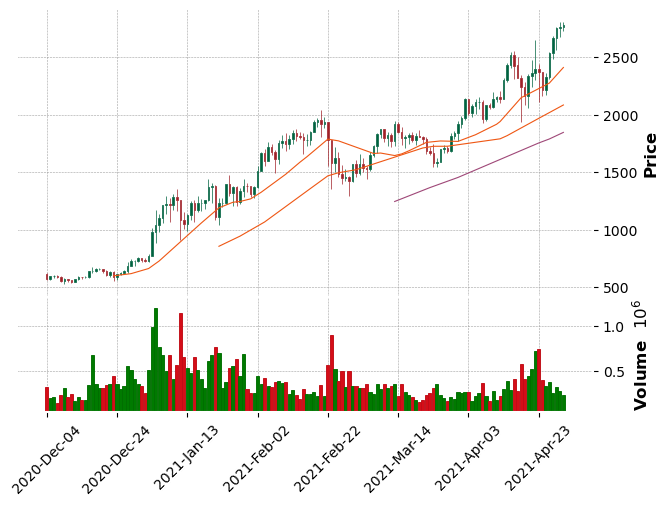

In [27]:
plot_chart(doge_data,'Ethereum')


In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
            go.Candlestick(
                x=doge_data.index,
                low=doge_data.low,
                high=doge_data.high,
                close=doge_data.close,
                open=doge_data.open,
                increasing_line_color='green',
                decreasing_line_color='red'
            )
)
fig.add_trace(go.Bar(x=doge_data.index, y=doge_data['volume'],marker={'color': doge_data['tag']}),secondary_y=True)


fig.update_layout(
    title = 'Ethereum Price',
    yaxis_title = 'Ethereum Price USD ($)',
    xaxis_title = 'Date'
)
fig.show()

## Bonus section on pulling bids and asks
This is particularly useful to see what's the volume of buyer and selling buying price __(bids)__ and selling price __(asks)__

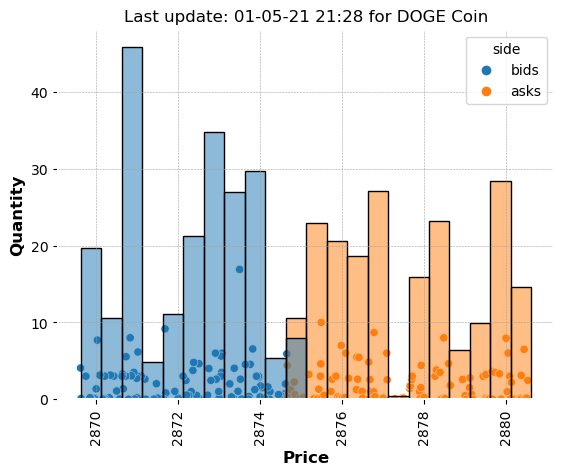

In [30]:
r = requests.get("https://api.binance.com/api/v3/depth",
                 params=dict(symbol="ETHBUSD"))
results = r.json()
binwidth = 0.5
frames = {side: pd.DataFrame(data=results[side], columns=["price", "quantity"],
                             dtype=float)
          for side in ["bids", "asks"]}
frames_list = [frames[side].assign(side=side) for side in frames]
data = pd.concat(frames_list, axis="index", 
                 ignore_index=True, sort=True)
price_summary = data.groupby("side").price.describe()
fig, ax = plt.subplots()

ax.set_title(f"Last update: {datetime.now().strftime('%d-%m-%y %H:%M')} for DOGE Coin")
sns.histplot(x="price", weights="quantity", hue="side", binwidth=binwidth, data=data, ax=ax)
sns.scatterplot(x="price", y="quantity", hue="side", data=data, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

## Calculation of resistance and support using programtic way

In [1]:
!pip install trendln

  Created wheel for trendln: filename=trendln-0.1.10-py2.py3-none-any.whl size=19498 sha256=f18cde09efe9c70dcdb2cefa461d2e917b9b256f80534e9ef5e3b4eb47e9b6d2
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\58\d7\5d\940142b1c7369d867dbbe2586d3300c21eb6f1e0af39108c3a
  Created wheel for findiff: filename=findiff-0.8.9-py3-none-any.whl size=29218 sha256=e416b8099d51260240f4751e2f0b13db22ff337066c440c2568a555e845b96ab
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\72\64\7b\009d4ccf603b1e1c1929d35c6c31071e7dca901546c2973e51
Successfully built trendln findiff


In [25]:
import numpy as np
doge_data['close'] = doge_data['close'].round(decimals=0).astype('int')

In [35]:
import yfinance as yf # requires yfinance - pip install yfinance
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
h = hist[-1000:].Close
mins, maxs = trendln.calc_support_resistance(h,accuracy=8)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].Low, None),accuracy=8) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].Low, hist[-1000:].High),accuracy=8)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs
# doge_data['close'] = doge_data['close']

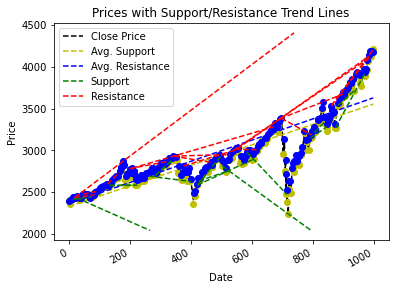

<Figure size 432x288 with 0 Axes>

In [37]:
fig = trendln.plot_support_resistance(hist[-1000:].Close,accuracy=8) # requires matplotlib - pip install matplotlib
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure

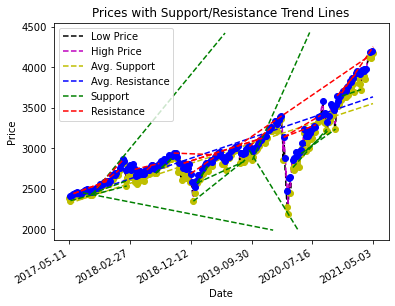

<Figure size 432x288 with 0 Axes>

In [39]:
idx = hist[-1000:].index
fig = trendln.plot_sup_res_date((hist[-1000:].Low, hist[-1000:].High), idx,accuracy=8) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure

In [49]:
import trendln
# # this will serve as an example for security or index closing prices, or low and high prices
# import yfinance as yf # requires yfinance - pip install yfinance
# tick = yf.Ticker('^GSPC') # S&P500
# doge_data['close'] = doge_data['close']
hist = doge_data
h = doge_data.close
mins, maxs = trendln.calc_support_resistance(h,accuracy=8)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-1000:].low, None),accuracy=8) #support only
mins, maxs = trendln.calc_support_resistance((hist[-1000:].low, hist[-1000:].high),accuracy=8)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

In [50]:
hist.index

DatetimeIndex(['2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15',
               ...
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-01',
               '2021-05-01', '2021-05-02'],
              dtype='datetime64[ns]', name='timestamp', length=150, freq=None)

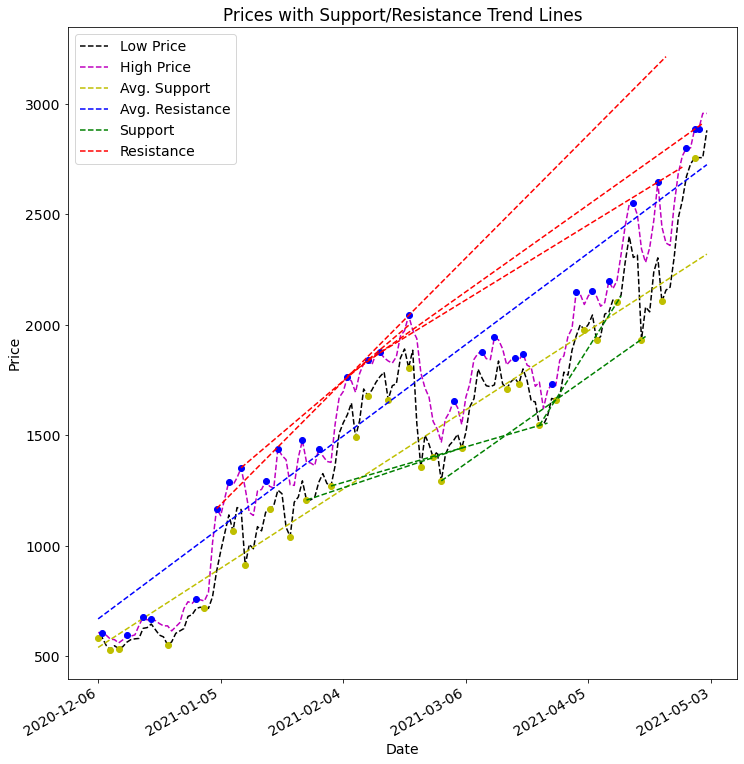

<Figure size 432x288 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(12,12))
idx = hist.index
fig = trendln.plot_sup_res_date((hist.low, hist.high), idx,accuracy=8) #requires pandas
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure